# Untersuchung von Ellipsen als Radius im HACI-Algorithmus

Bisher wird im HACI-Algorithmus ein kreisförmiger Radius um ein zu untersuchendes Objekt gelegt, um einen ausreichenden Abstand zu benachbarten Objekten festzustellen. Im RADOLAN-Gitter haben die Pixel entlang der Bezugsfläche eine Größe von 1 km &times; 1 km. Allerdings sollte auch hier die Pixelgröße am Rand der Projektion zunehmen. Im MSG-Gitter ist diese Abhnägigkeit noch viel stärker. In diesem Notebook sehen wir uns mal an, wie sich das genau verhält.

In [217]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from matplotlib.patches import Polygon
from mpl_toolkits.basemap import pyproj
from mpl_toolkits.basemap import Basemap

import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
from pyproj import Geod
import cartopy.mpl.ticker as cticker

In [254]:
def plot_map_tissot_indicatrix(projection,radius):
    plt.figure(figsize=(10,10))
    
    ax = plt.axes(projection=projection)
    ax.coastlines("50m")
    geod = Geod(ellps='WGS84')

    states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                              name='admin_0_countries')
    _ = ax.add_feature(states, edgecolor='gray')
    ax.set_extent([3.5889, 15.7208,46.9526, 54.7405], ccrs.PlateCarree())
    ax.tissot(rad_km = radius,
              lons = np.arange(0,18,1),
              lats = np.arange(45,56,1),
              facecolor='blue', alpha=0.7)
    plt.show()

## 1. RADOLAN-Projektion

Die RADOLAN-Projektion ist eine polarstereographische Projektion auf eine Projektionsebene, die die Erdkugel mit einem Radius von r<sub>e</sub>&#8239;=&#8239;6374,04&#8239;km bei &phi;<sub>TS</sub>&#8239;=&#8239;60&#8239;°N schneidet. Das Koordinatensystem ist ein karthesisches Koordinatensystem mit dem Urpsrung bei &lambda;<sub>0</sub>&#8239;=&#8239;10&#8239;°O und &phi;<sub>0</sub>&#8239;=&#8239;90&#8239;°O und einem Bezugspunkt bei &lambda;<sub>M</sub>&#8239;=&#8239;9&#8239;°O und &phi;<sub>M</sub>&#8239;=&#8239;51&#8239;°N, der den Mittelpunkt des Komposits darstellt.

In [227]:
radolan_projection = ccrs.Stereographic(central_latitude=60,
                                        central_longitude=10,
                                        false_easting=0.0,
                                        false_northing=0.0,
                                        true_scale_latitude=60, globe=None)

/home/lenk/.local/lib/python2.7/site-packages/Cartopy-0.16.0-py2.7-linux-x86_64.egg/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f73830682f0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


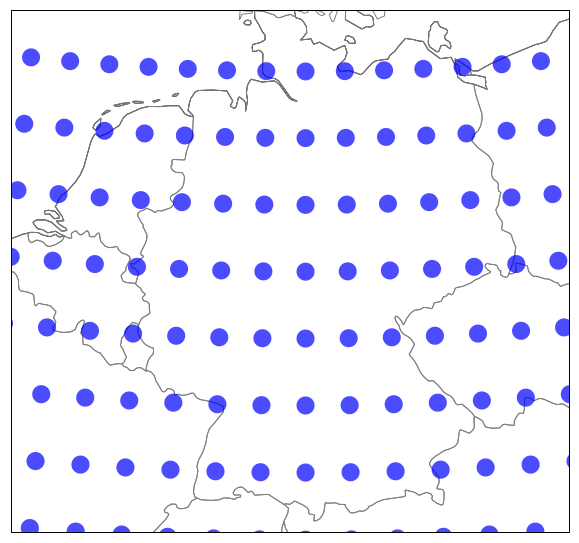

In [255]:
plot_map_tissot_indicatrix(radolan_projection,15)

Das sieht doch recht gut aus. Eine stereographische Projektion ist winkeltreu, aber nicht flächentreu. Aber im verwendeten Ausschnitt scheinen die Unterschiede nicht sehr groß zu sein.

## 2. MSG-Projektion

Die MSG-Projektion ist eine geostationäre Projektion. Die Satellitenhöhe ist 35.785.831&#8239;m über der Erdoberfläche, und die beiden Halbachses des Erdellipsoids betragen a&#8239;=&#8239;6.378.169&#8239;m und b&#8239;=&#8239;6.356.583,8&#8239;m. Für den Satelliten im Hauptscanmodus ist &lambda;<sub>0</sub>&#8239;=&#8239;0&#8239;°O und für den Satelliten im Schnellscanmodus ist &lambda;<sub>0</sub>&#8239;=&#8239;9.5&#8239;°O.

In [214]:
msg_projection = ccrs.Geostationary(central_longitude=9.5, 
                                    satellite_height=35785831,
                                    false_easting=0, false_northing=0, globe=None)

/home/lenk/.local/lib/python2.7/site-packages/Cartopy-0.16.0-py2.7-linux-x86_64.egg/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f7382746e30> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


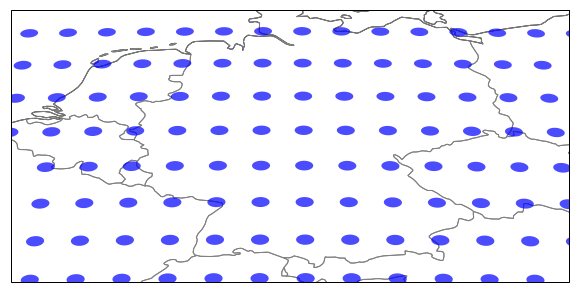

In [260]:
plot_map_tissot_indicatrix(msg_projection,15)

Die Verzerrung in der geostationären Projektion ist deutlich größer. Umkreise sollten hier eher als Ellipsen gestaltet sein.